# Исследование: "Выявление определяющих успешность игры закономерностей" 

### Описание проекта
Интернет-магазин, который продает компьютерные игры. 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). **Нам необходимо выявить определяющие успешность игры закономерности.** Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<br>
<br>
<br>
*В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.

### Цель исследования: 
Вне зависимости от рассматриваемого года (с точки зрения прогнозирования продаж) выявить закономерности, определяющие успешность игр. 

## Этапы исследования

[Шаг 1. Откроем файл с данными и изучим общую информацию](#a)

[Шаг 2. Подготовим данные](#b)

[Шаг 3. Проведем исследовательский анализ данных](#c)

[Шаг 4. Составим портрет пользователя каждого региона](#d)

[Шаг 5. Проверим гипотезы](#e)

[Шаг 6. Напишем общий вывод](#f)

<a id='a'></a>

## Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv(r'C:\Users\Матвей\Desktop\data_scientist\Сборный проект 1\games.csv')
display(data.info())
display(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
# Проверим на наличие дубликатов
# всей таблицы
display(data.duplicated().sum())
# отдельно взятого столбца
display(data['Name'].value_counts())
display(data[data['Name'] == 'Need for Speed: Most Wanted'])

0

Need for Speed: Most Wanted                       12
LEGO Marvel Super Heroes                           9
Madden NFL 07                                      9
Ratatouille                                        9
FIFA 14                                            9
                                                  ..
Eyeshield 21: DevilBats DevilDays                  1
Rayman DS                                          1
The King of Fighters '99                           1
Demon Gaze 2                                       1
Super Robot Taisen: Scramble Commander the 2nd     1
Name: Name, Length: 11559, dtype: int64

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Дубликатов в таблице нет, однако вот названия игр повторяются. На примере "Need for Speed: Most Wanted" мы выяснили почему. Это связано с выходом одной и той же игры на разных платформах в разные годы. Что интересно заметить: на некоторых платформах присвоен разный ESRB рейтинг. С чем же это связано?.. 

<a id='b'></a>

## Шаг 2. Подготовим данные

In [3]:
# Заменим названия столбцов(приведем к нижнему регистру)

data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Можем наблюдать пару столбцов, в которых необходимо поменять тип данных.**
1. Год выпуска. Уберем дробь, год - это целочисленное значение.
2. Столбец оценки пользователей. Приведем к вещественному типу данных.


In [4]:
# СТОЛБЕЦ "year_of_release"

data['year_of_release'] = data['year_of_release'].astype('Int16')

#НАЙДЕМ NAN-овские ЗНАЧЕНИЯ В СТОЛБЦЕ "year_of_release" И ПРОВЕРИМ НА НАЛИЧИЕ "ГОДА" СТОЛБЕЦ НАЗВАНИЯ ИГРЫ

display(data['year_of_release'].unique())
pust = data.query('year_of_release == "NaN"')
display(pust)


# ИЗВЛЕЧЕМ ИЗ СТОБЦА "name" ГОД ИЗДАНИЯ ИГРЫ И ЗАПОЛНИМ ПРОПУСК В СТОЛБЦЕ "year_of_release"

# for row in data['name']:
#     if (row[-4:]).isnumeric():
#             data[row]['year_of_release'].fillna(int(string[-4:]))


# for row in data['name']:
#     for word in row.split():
#         if word.isnumeric() and word == (row[-4:]):
#             data[row]['year_of_release'].fillna(int(row[-4:]))


# СТОЛБЕЦ 'user_score'
data['user_score'].value_counts()
data['user_score'].unique()
# Привести к вещественному типу данных "мешает" аббревиатура 'tbd', 
# что в переводе с английского (to be determined) - "будет определено".
# Соответственно пользовательского рейтинга у той или иной игры еще нет. Заменим эти значения на "Nan", как неизвестное значение
# Плюсом ко всему, в таком случае мы сможем проводить математические операции с этим столбцом, 
# так как "Nan" - число с плавающей запятой
data['user_score'] = data['user_score'].replace('tbd', 'Nan').astype('float32')


# СТОЛБЕЦ 'rating'
# заменим нановские значения на аббревиатуру NoR (с англ. no rating), так как в последующем анализе будем это использовать
data['rating'] = data['rating'].fillna('NoR')
data.info()
data



<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000,  NaN, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int16

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int16
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float32
rating             16715 non-null object
dtypes: Int16(1), float32(1), float64(5), object(4)
memory usage: 1.3+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NoR
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NoR
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NoR
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NoR
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NoR
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NoR


**Пришло время поразмыслить над наличием пропусков, и как мы их будем заполнять, если вообще будем.**\
У нас есть 6 столбцов с неполными данными:
1. "name": поскольку нам нужно выявить определяющие успешность игры закономерности, необходим рейтинг и оценки, ведь они и определяет этот параметр. Название игры не так важно. Тем более, у нас всего 2 пропуска, в случае чего - удалим эти строки (это никак не повлияет на выводы по исследованию), а пока оставим, как есть.

2. "year_of_release": оставляем пропущенные значения без замен.

3. "genre": тут ситуация интереснее, так как жанр напрямую может влиять на успешность игры. Удалим строки с пропущенными значениями в этом столбце (их всего 2).

4-5. "critic_score" и "user_score": так как это индивидуальные оценки по каждой игре, мы не можем заменить пропуски, используя коррелирующий параметр. А с аббревиатурой "tbd" мы уже разобрались, заменив ее значения в "user_score" на "Nan". Остальные пропуски оставим как есть, в силу оригинальности каждой из игр.

6. "rating": по аналогочиной причине, как в случае с пунктами 5 и 6, оставим пропуски без внимания.

In [5]:
data = data.dropna(subset = ["genre"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int16
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float32
rating             16713 non-null object
dtypes: Int16(1), float32(1), float64(5), object(4)
memory usage: 1.4+ MB


Как видим, после удаления 2ух строк с пропущенными значениями в столбце "genre", у нас потерялись изначально отмеченные пропуски в столбце "name".

В остальном руководствовались мотивом минимального искажения данных. Большинство пропусков оставили без внимания. 

Возникновение же пропусков возможно по разным причинам, начиная с неправильно экспортированного файла, и заканчивая отсутствием оценок пользователей и критиков в силу недавней даты релиза.

**Теперь посчитаем суммарные продажи во всех регионах.**

In [6]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NoR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NoR,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NoR,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NoR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NoR,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NoR,0.01


**Видно, что количество продаж в том или ином регионе зависит от его населения. Так, например, Японии со своими 126 млн жителей сложнее тягаться с Европой в 740 млн человек по количеству продаж. Однако совокупные продажи по всем регионам сразу могут показать достойный результат.**

<a id='c'></a>

## Шаг 3. Проведем исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

In [7]:
display(data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count'))

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Можем наблюдать стремительный рост количества выпускаемых игр, начиная с 1993 года и вплоть до 2009. Однако после, прогресс пошел на убыль.

На вопрос "нужно ли брать все периоды для оценки" однозначного ответа нет.

Так, к примеру, если брать игры до 90ых, то выпуск насчитывал в среднем не более 20 новых игр в год. Играли в то, что было, за неимением большого разнообразия? При таком раскладе четкую закономерность не вывести, это довольно частный случай. По идее, стоит откинуть этот период. Но с другой стороны, Super Mario анонсировали аж в 1985, а продажи поражают размахом. Нельзя просто дропнуть такие весомые значения. 

Поэтому будем использовать все периоды.

**Теперь посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределения по годам.**

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


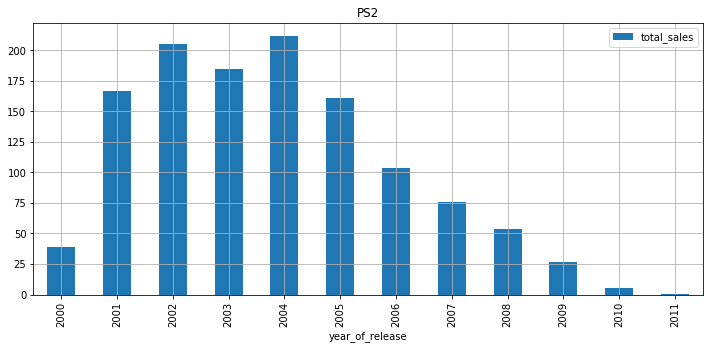

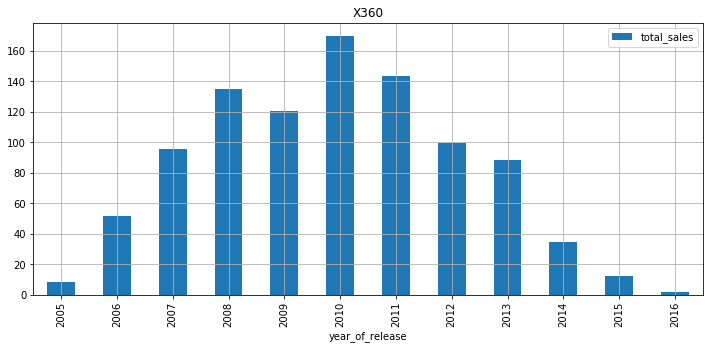

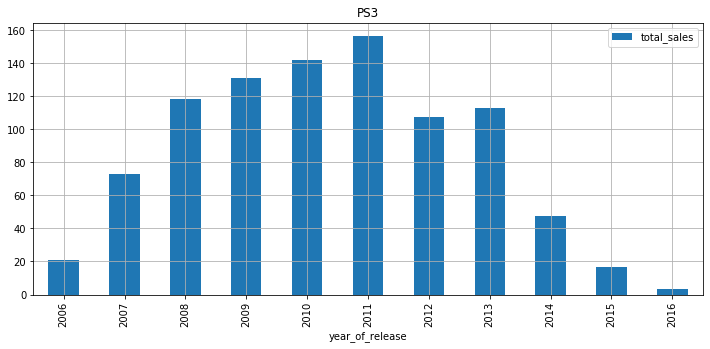

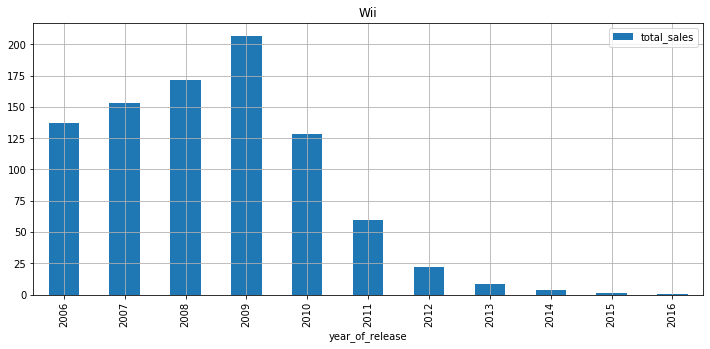

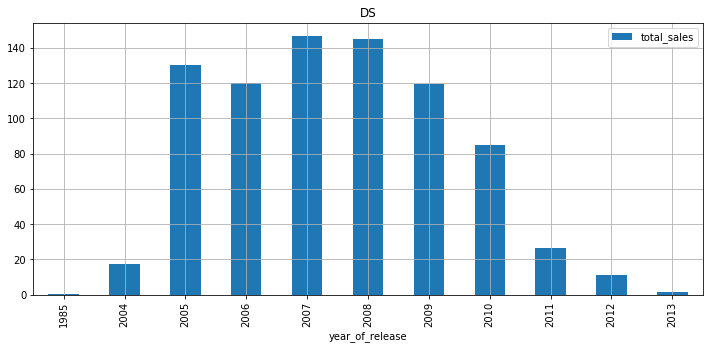

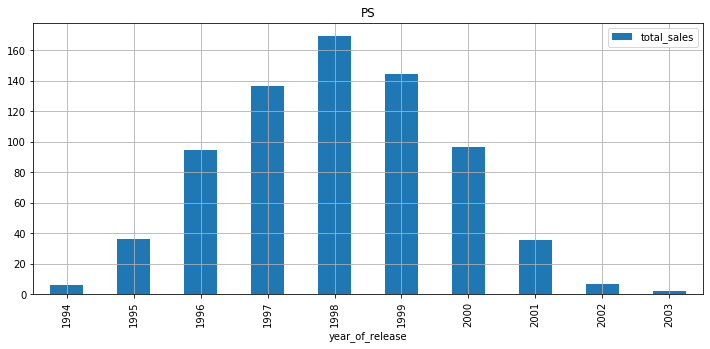

In [8]:
# Выведем суммарные продажи по каджой платформе
platform_total_sales = (data
        .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
        .sort_values(by = 'total_sales', ascending = False)
       )

display(platform_total_sales)



# Напишем функцию для построения графика с распределением общих продаж по годам
import matplotlib.pyplot as plt

def platform_year_total_sales(platform_i):
    a = (data
        .query('platform == @platform_i')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .plot(kind = 'bar', grid = True, figsize = (12,5))
    )
    a.set_title(platform_i)
    return plt.show()


# Выберем платформы с наиболее весомыми суммарными продажами (первые шесть: PS2, X360, PS3, Wii, DS, PS)
# Создадим список из этих платформ и пройдемся по нему циклом

spisok = platform_total_sales.index[0:6]
for i in spisok:
    platform_year_total_sales(i)

Через 1-2 года после выхода на рынок платформы набирают популярность, продажи начинают резко расти. 

Однако их существование ограничивается (в среднем) 11-12 летней продолжительностью.

<br>
<br>
<br>

**Определим "актуальный период". \
Основной фактор — эти данные помогут построить прогноз на 2017 год.**

Тут дело не в актуальном периоде (хотя он составляет 11 лет, и соответственно надо брать данные с 2007 года), а в платформах, которые в 2017 году все еще продолжили существовать. \
Для этого необходимо определить, выпускала ли игры та или иная платформа в 2016.

In [9]:
# Выделим условие: платформа должна была выпустить игры в 2016.
data_2016 = data.query('year_of_release == 2016')


name_platform = data_2016['platform'].unique().tolist()


# Разобьем данные выпущенных игр по платформам и годам выпуска. Используем сводные таблицы.

got = (data
    .query('platform == @name_platform')
    .pivot_table(index = 'year_of_release', columns ='platform', values = 'total_sales', aggfunc = 'sum')
)
got.fillna('-')

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
1985,-,0.04,-,-,-,-,-,-,-
1988,-,0.03,-,-,-,-,-,-,-
1992,-,3.03,-,-,-,-,-,-,-
1994,-,12.87,-,-,-,-,-,-,-
1995,-,4.22,-,-,-,-,-,-,-
1996,-,10.58,-,-,-,-,-,-,-
1997,-,11.27,-,-,-,-,-,-,-
1998,-,3.26,-,-,-,-,-,-,-
1999,-,4.74,-,-,-,-,-,-,-


Вспоминая соотношения количества игр к году их выпуска (на всех платформах суммарно), можно не удивляться тому, что на большинстве платформ дела пошли на спад. Ведь начиная с 2009 года, общий выпуск начал сокращаться. \
В 2009 мы могли  наблюдать 1400+ игр, а в 2016 - всего 500.

**Теперь узнаем, какие платформы лидируют по продажам, какие растут, а какие падают.
Выберем несколько потенциально прибыльных платформ.**

Для этого отобразим на графике все ранее выбранные платформы (те, которые продолжили выпуск в 2016).

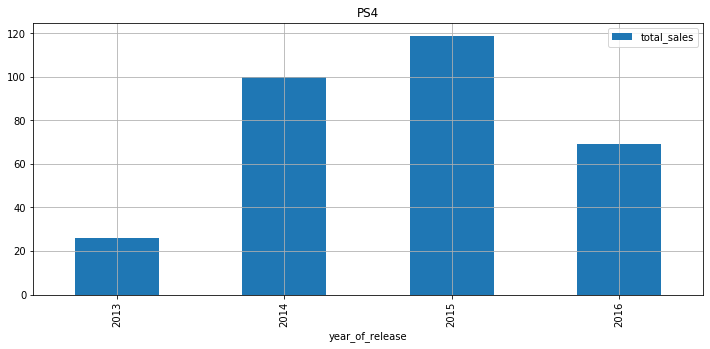

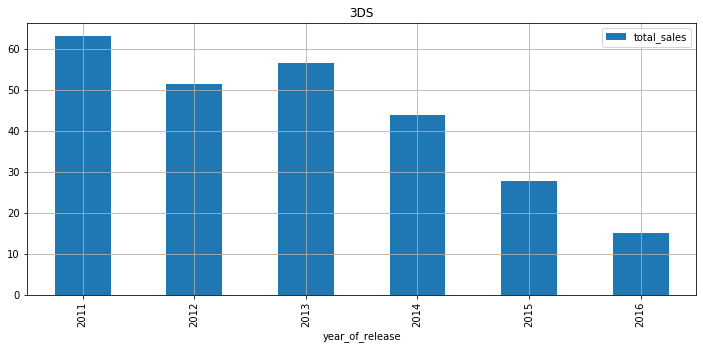

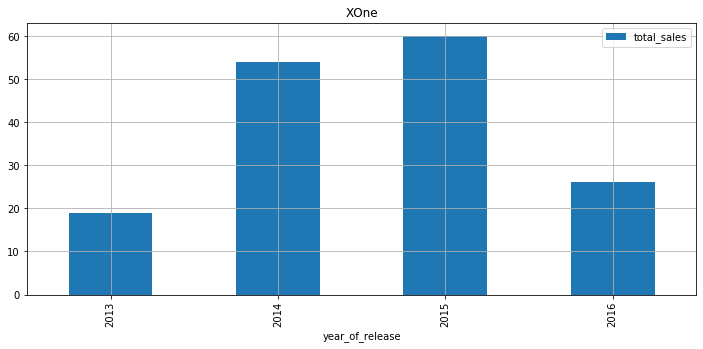

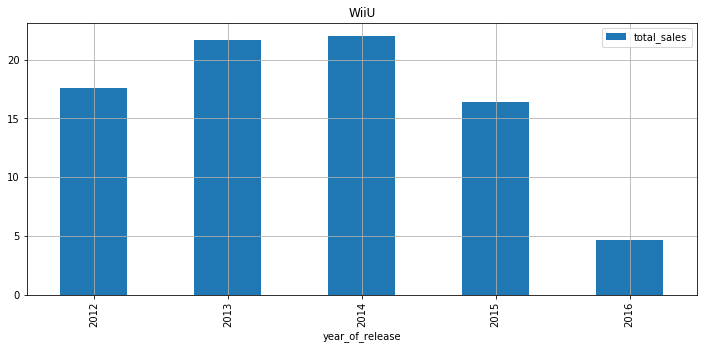

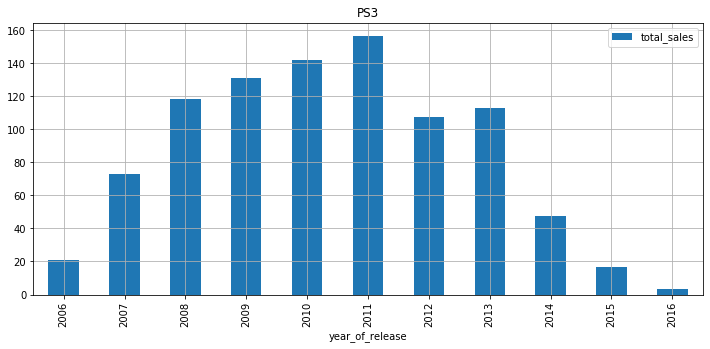

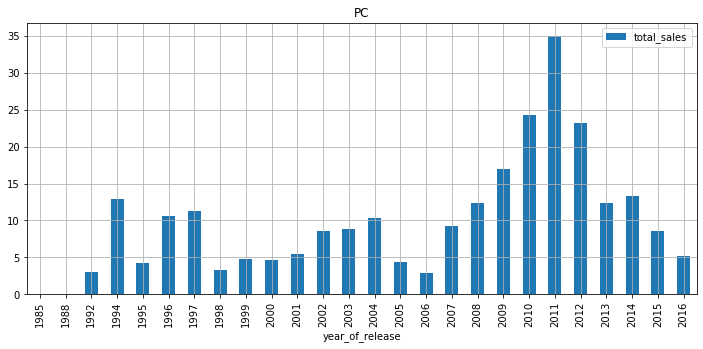

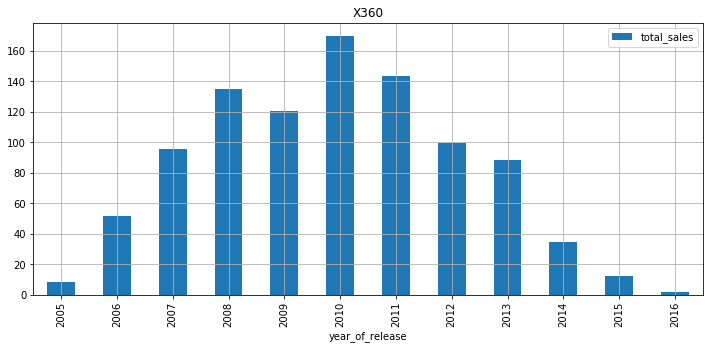

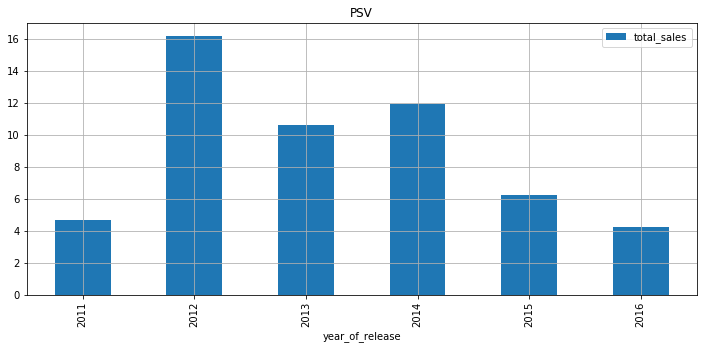

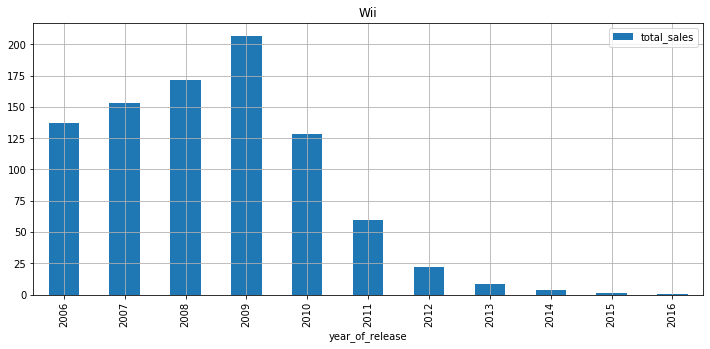

In [10]:
for i in name_platform:
    platform_year_total_sales(i)

Посмотрев на графики, можно выделить парочку подававших надежд в 2016 году платформ: PS4 и XOne. В большинстве своем, они неплохо показали себя за свое короткое время существования. Суммарные продажи явно лучше, чем у других. 
<br>





У всех остальных платформ малоперспективное будущее по следующим причинам:
1. При входе на рынок почти сразу стагнировали, не показав отличительные результаты.
2. Довольно малый объем продаж.
3. Жизненный цикл платформы (11 лет) подошел к концу.

**Теперь построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам.**

Все же перед этим введя ограничения по актуальному периоду (11 лет). То есть датафрейм будет ограничен по году выпуска (>2007).

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 15)

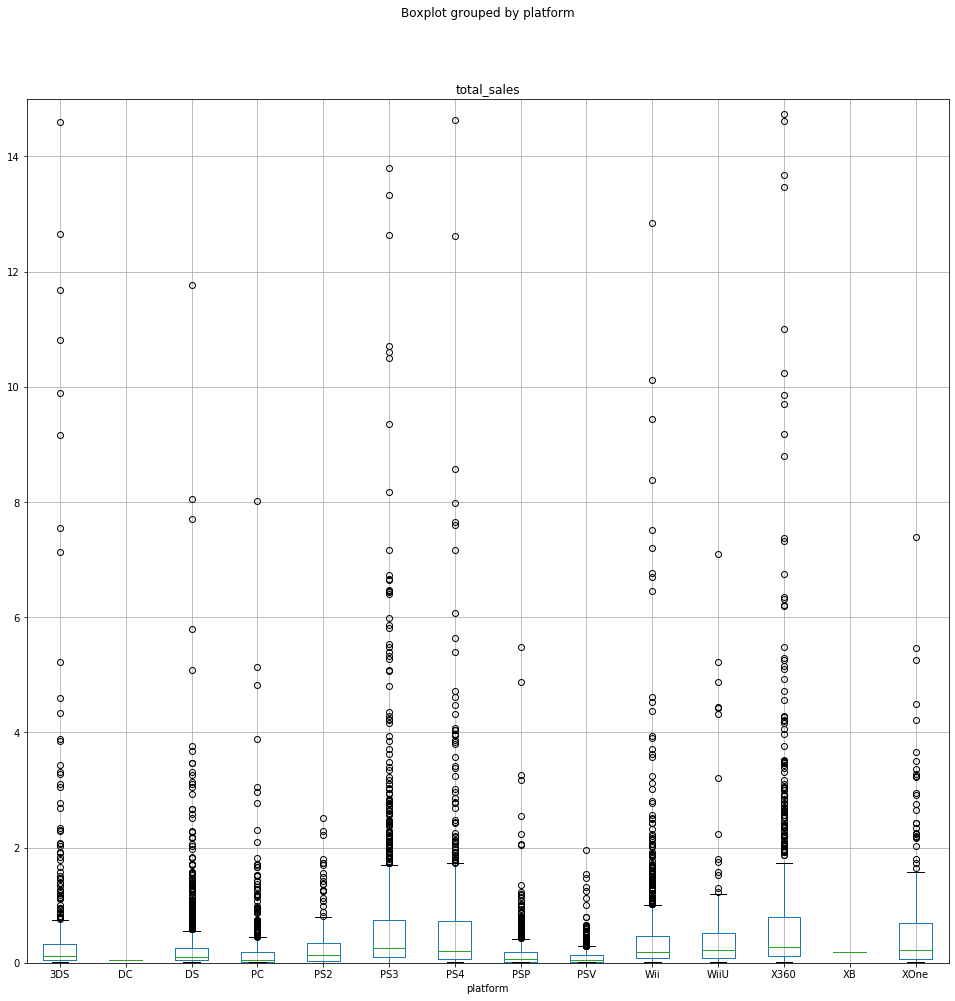

In [11]:
data_07 = data.query('year_of_release > 2007')

data_07.boxplot('total_sales', by = 'platform', figsize = (16,16))
plt.ylim(0, 15)

Почти все платформы можно охарактеризовать серьезными выбросами (учитываем ограничения по "y-оси", в противном случае было бы не очень наглядно).

У всех платформ большая часть значений лежат в 3ем и 4ом квартилях. \
Также видно, что медиана не стремится к длинному хвосту высоких значений, что означает редкость тех значений, которые отсек верхний ус.

Серьезно выделяются следующие платформы: PS4, PS3, X360, XOne.

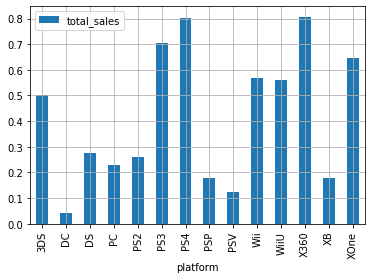

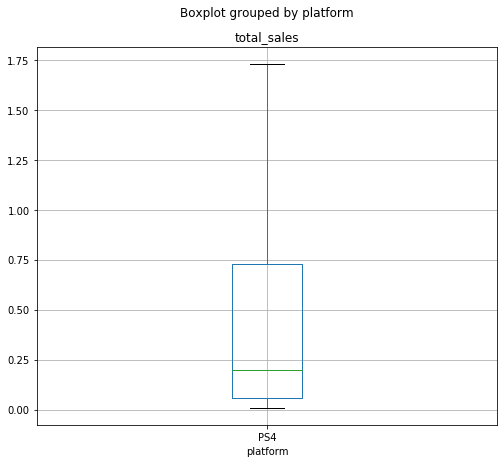

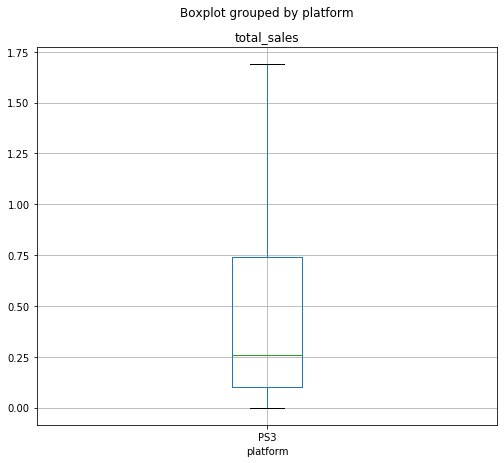

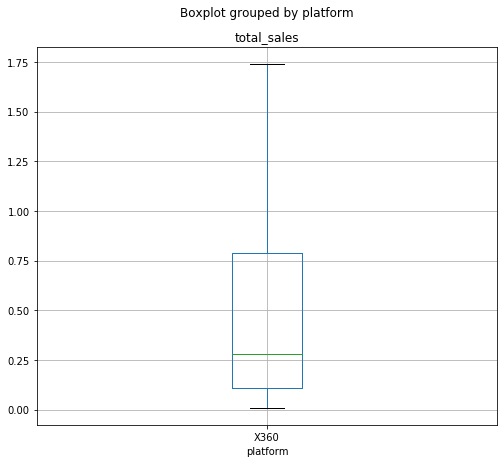

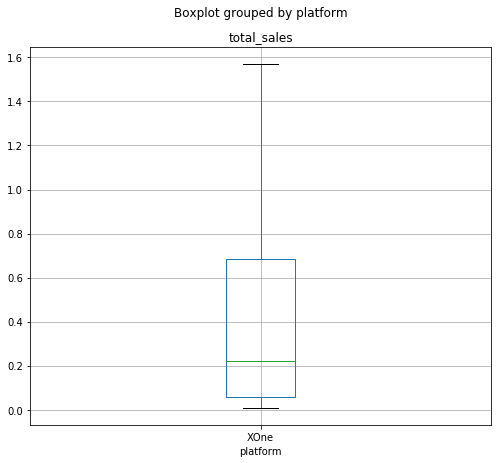

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


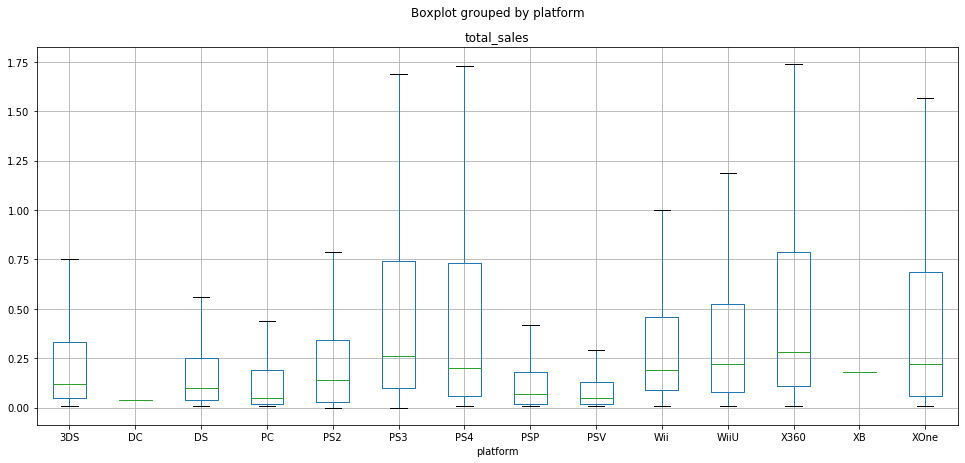

In [12]:
#1. Построим пандовский барплот
(data_07
     .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'mean')
     .plot(kind = 'bar', grid = True)
)

#2.Построим ящики для выбранных платформ
vibr = ['PS4', 'PS3', 'X360', 'XOne']
for i in vibr:
    data_07[data_07['platform'] == i].boxplot('total_sales', by = 'platform', figsize = (8,7), showfliers = False)
    plt.show()


#3. Обежем выбросы
data_07.boxplot('total_sales', by = 'platform', figsize = (16,7), showfliers = False)

**Теперь посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**\
Выберем платформу PS3.\
**Построим диаграмму рассеяния и посчитаем коррелляцию между отзывами и продажами.**

Корреляция м/у отзывами пользователей и продажами: 0.11507962660815586
Корреляция м/у отзывами критиков и продажами: 0.43373151728268966


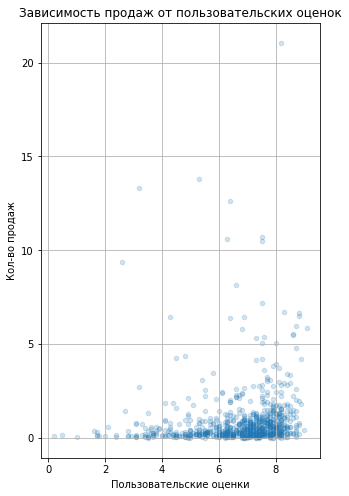

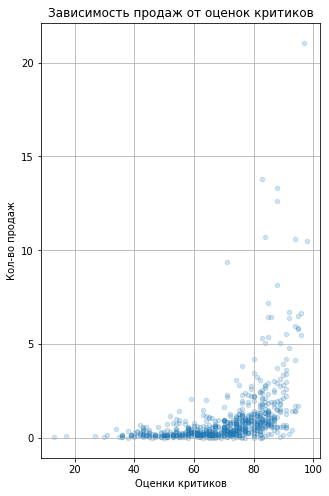

In [13]:
# Посчитаем корреляцию между отзывами и продажами
def cor(platforma):
    srez = data_07.query('platform == @platforma')
    print('Корреляция м/у отзывами пользователей и продажами:', srez['total_sales'].corr(srez['user_score']))
    print('Корреляция м/у отзывами критиков и продажами:', srez['total_sales'].corr(srez['critic_score']))
    
cor('PS3')

# Построим диаграмму рассеяния
ps3 = data_07.query('platform == "PS3"')

tu = ps3.plot(y = 'total_sales', x = 'user_score', kind = 'scatter', grid = True, figsize = (5,8), alpha=0.2)
tu.set_title('Зависимость продаж от пользовательских оценок')
tu.set_xlabel('Пользовательские оценки')
tu.set_ylabel('Кол-во продаж')
plt.show()

tc = ps3.plot(y = 'total_sales', x = 'critic_score', kind = 'scatter', grid = True, figsize = (5,8), alpha=0.2)
tc.set_title('Зависимость продаж от оценок критиков')
tc.set_xlabel('Оценки критиков')
tc.set_ylabel('Кол-во продаж')
plt.show()

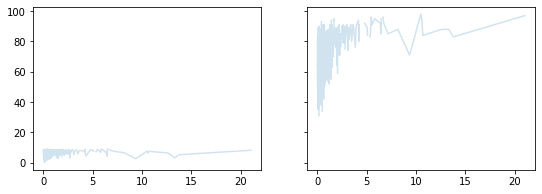

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)

axs[0].plot(ps3['total_sales'], ps3['user_score'], alpha=0.2)

axs[1].plot(ps3['total_sales'], ps3['critic_score'], alpha=0.2)

plt.show()

Можем видеть из графиков и высчитанного коэффициента корреляции, что взаимосвязь между отзывами пользователей и продажами - минимальна, коэффициент выдает всего 0.11. \
Чего не скажешь про зависимость продаж от оценки критиков. При покупке игр люди все же опираются на отзывы экпертов в своем деле. Не повальное большинство конечно, в силу коэф.корр. = 0.44, но некоторое множество точно.



**Подтвердим наши выводы другими примерами**

In [15]:
print('ПЛАТФОРМА: X360')
cor('X360')
print()
print('ПЛАТФОРМА: Wii')
cor('Wii')
print()
print('ПЛАТФОРМА: XOne')
cor('XOne')

ПЛАТФОРМА: X360
Корреляция м/у отзывами пользователей и продажами: 0.10110100208479174
Корреляция м/у отзывами критиков и продажами: 0.3886526625814236

ПЛАТФОРМА: Wii
Корреляция м/у отзывами пользователей и продажами: 0.13024202917615826
Корреляция м/у отзывами критиков и продажами: 0.2251085171069155

ПЛАТФОРМА: XOne
Корреляция м/у отзывами пользователей и продажами: -0.06892505319711208
Корреляция м/у отзывами критиков и продажами: 0.41699832800840175


**Как и следовало ожидать, зачастую люди, покупающие игры, склонны верить критикам и почти не доверять другим пользователям.**


**Теперь посмотрим на общее распределение игр по жанрам. Какие из них самые прибыльные?**

In [16]:
data_07.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)

,total_sales
genre,
Action,945.74
Shooter,608.19
Sports,560.34
Role-Playing,421.57
Misc,396.43
Racing,226.41
Platform,195.38
Simulation,150.78
Fighting,148.51


Различие явно имеется. \
Верхние строчки рейтинга составляют игры с жанрами "Action", "Shooter", "Sports", где действия происходят быстро и моментально. \
Гораздо менее продаваемыми считаются игры жанра "Strategy" и "Puzzle".\
Разброс составляет 900 млн проданных копий!

<a id='d'></a>

## Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) следующие параметры:
- самые популярные платформы (топ-5). Опишем различие в долях продаж.
- самые популярные жанры (топ-5). Поясним разницу.
- выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [17]:
#1. Самые популярные платформы (топ-5)

def popular(region, values):
    popular_platf = (data_07\
                    .pivot_table(index = values, values = region, aggfunc = 'sum')\
                    .sort_values(by = region, ascending = False))
    print(popular_platf.head())
    
popular('na_sales', 'platform')
print()
popular('eu_sales', 'platform')
print()
popular('jp_sales', 'platform')

          na_sales
platform          
X360        490.69
PS3         349.13
Wii         332.87
DS          198.73
PS4         108.74

          eu_sales
platform          
PS3         293.73
X360        234.88
Wii         170.74
PS4         141.09
PC           92.17

          jp_sales
platform          
3DS         100.62
DS           76.12
PS3          74.11
PSP          60.46
Wii          47.01


Вероятней всего у Северной Америки на первом месте стоит платформа X360 из-за производителя Microsoft. Так сказать, американская компания адаптировала приставку под американский рынок. И в счет удобства граждане тех стран покупают именно ее.

Европейцы же мешают приставки 2ух стран, в то время как японцы используют исключительно свои девайсы.

Что интересно: в Японии пользуются спросом приставки 3DS и DS, которые являются детищем Nintendo (японской компании , специализирующейся на создании видеоигр и игровых консолей), в то время, как PS3 и PSP (результат работы компании Sony) не занимают лидирующих позиций. 

In [18]:
#2. Cамые популярные жанры (топ-5)

popular('na_sales', 'genre')
print()
popular('eu_sales', 'genre')
print()
popular('jp_sales', 'genre')

              na_sales
genre                 
Action          433.74
Shooter         311.26
Sports          276.27
Misc            211.61
Role-Playing    155.81

              eu_sales
genre                 
Action          310.59
Shooter         208.35
Sports          185.19
Misc            107.00
Role-Playing     94.46

              jp_sales
genre                 
Role-Playing    138.12
Action           90.16
Misc             37.33
Sports           30.69
Adventure        23.36


Чтож, популярные жанры в Северной Америке и Европе совсем не отличаются (в порядке убывания: Action, Shooter, Sports, Misc, Role-Playing)\
А вот в Японии на первом месте стоит наоборот ролевой гейминг (жанр компьютерных игр, основанный на элементах игрового процесса традиционных настольных ролевых игр), и также присутствуют Action, Misc, Sports.

In [19]:
#3. Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе.

popular('na_sales', 'rating')
print()
popular('eu_sales', 'rating')
print()
popular('jp_sales', 'rating')

        na_sales
rating          
E         536.93
M         502.60
T         303.41
E10+      251.88
NoR       218.51

        eu_sales
rating          
M         362.65
E         326.61
NoR       188.85
T         187.62
E10+      144.53

        jp_sales
rating          
NoR       220.60
E          77.17
T          64.51
M          39.33
E10+       25.67


Опишем классификацию:
- «EC» («Early childhood») — «Для детей младшего возраста»:
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

Посмотрев на таблицы, можно сделать, вывод, что влияет.
Также внедрилась львиная доля безрейтинговых игр. В Японии они занимают 1st места по продажам!

В Северной Америке и Европе тоже чувствуются весомо ~ 200 млн игр!

Так, в Америке самые продаваемые игры, обладают рейтингом "Е", в Европе "М", а в Японии "NoR"

Но нельзя забывать, что возможно влияние и других факторов на сравнение по рейтингу и территориальному параметру, например, распределение населения по возрастам (где-то преобладает количество детей, где-то превалирует старшее поколение).
Поэтому дать точный ответ, влияет ли - решительно нельзя, не достает данных. 
Однако есть сухие цифры, которые можно использовать для вывода.

**Подведем итоги, и слепим портрет пользователя каждого региона:**
- Северная Америка: пользователь от 10 лет, играющий на платформе X360 в жанры "action" и "shooter".
- Европа: в целом, тоже самое, только платформа PS3.
- Япония: безвестный пользователь, играющий на платформах японских производителей (3DS, DS,...) в жанры "Role-Playing" и "action".

Разумеется, портрет не точный, а обобщенный.

<a id='e'></a>

## Шаг 5. Проверим гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

**Рассмотрим первую гипотезу. \
Примем за нулевую: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". \
А за альтернативную: "Средние пользовательские рейтинги платформ Xbox One и PC разные".**

In [20]:
from scipy import stats as st


rating_xbox = data_07.query('platform == "XOne" and user_score != "Nan"')
rating_pc = data_07.query('platform == "PC" and user_score != "Nan"')



# Проведем тест Левена на нормальность распределения дисперсий
results1 = st.levene(rating_xbox['user_score'], rating_pc['user_score'])
if results1.pvalue > 0.05:
    results = st.ttest_ind(rating_xbox['user_score'], rating_pc['user_score'], equal_var = True)
else:
    results = st.ttest_ind(rating_xbox['user_score'], rating_pc['user_score'], equal_var = False)

alpha = .05 # пороговое значение
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.12954464236337104
Не получилось отвергнуть нулевую гипотезу


Проведение теста Левена (КОД ВЫШЕ):

"При p> 0,05 наборы данных соответствуют критерию дисперсии"
    
В нашем случае отличие получилось незначимое (> 0,05), поэтому выбираем `equal_var = True`



И как результат, видим, что средние пользовательские рейтинги платформ Xbox One и PC действительно одинаковые.

**Рассмотрим вторую гипотезу. \
Примем за нулевую: "Средние пользовательские рейтинги жанров Action и Sports одинаковые". \
А за альтернативную: "Средние пользовательские рейтинги жанров Action и Sports разные".**

In [21]:
action = data_07.query('genre == "Action" and user_score != "Nan"')
sports = data_07.query('genre == "Sports" and user_score != "Nan"')


# Проведем тест Левена на нормальность распределения дисперсий
results1 = st.levene(action['user_score'], sports['user_score'])

if results1.pvalue > 0.05:
    results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = True)
else:
    results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = False)


alpha = .05 # пороговое значение
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.911008731976016e-13
Отвергаем нулевую гипотезу


Выходит, что средние пользовательские рейтинги жанров Action и Sports не равны. Различаются.

Это, кстати говоря, подтверждает объем продаж в зависимости от жанра по разным регионам (вышенаписанные выводы). Игры жанра "Action" скупают повсеместно охотнее, и поэтому, вероятнее всего, средний пользовательский рейтинг у них выше, чем у жанра "Sports".

<a id='f'></a>

## Шаг 6. Напишем общий вывод

Итак, давайте обобщим наш анализ.

Перспективнее всего смотрятся игры на определенных платформах: PS4, PS3, X360, XOne. \
Заметим, что X360 и PS3 по определению заканчивают свой жизненный цикл существования, чего нельзя сказать об оставшихся. PS4 и XOne - сравнительно молодые и многообещающие платформы. Покупаем игры с поддержкой для этих платформ.

Жанр - немалозначимая вещь. \
На какие все же стоит обратить внимание? А вот и ответ: Action, Shooter, Sports, Role-Playing, Misc.\
Ими примерно в равной мере интересуются во всех регионах, так что тут не прогадать. 
Жанр "Action" очень прибылен, но нельзя забывать про диверсификацию рисков. Делаем упор и на остальные жанры в нашем списке.

На вопрос "влияет ли рейтинг ESRB на покупательскую способность" четкого ответа мы не нашли, однако, как показали данные, бОльшая часть продавалась с возрастной маркировкой "Для всех", "Для взрослых". Опять же, можно посмотреть и в сторону тинейджеров.


Получили универсальный набор, продавая который, мы точно не ошибемся. Разве что платформы могут менятся с течением времени (уходить старые и появляться новые).

Также по ходу нашего исследования мы выяснили пару интересующих нас моментов:
1. Пользователи частично прислушиваются к оценке критиков (коэф. корр. = 0.4), и почти совсем не обращают внимания на оценки других пользователей.
2. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
3. Средние пользовательские рейтинги жанров Action и Sports различаются (Action выше).

Эти знания мы также можем использовать при планировании рекламных кампаний.


На 2017 год, на наш взгляд, было бы лучше закупать игры с поддержкой для платформ PS4 и XOne.
    
Сделать упор на жанры Action, Shooter, Sports и Misc, поскольку именно их скупали чаще всего.

Сбывать продукцию в Северной Америке и Европе, в регионах с внушительным количеством проданных копий за предыдущие года.
    
Ориентироваться на игры для разных возрастных разбивок. Для Америки - игры с рейтингом 'E' и 'M' (по убыванию в количестве закупаемых копий), а для Европы наоборот ('M' > 'E'). Закупить частично игры для подростков.